<a href="https://colab.research.google.com/github/ElsaMolina/AluraStore_Draft/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [36]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [62]:
import pandas as pd
tienda = pd.read_csv(url)
#IngresoT = Ingreso Total

IngresoT_Tienda1 = tienda["Precio"].sum()
IngresoT_Tienda2 = tienda2["Precio"].sum()
IngresoT_Tienda3 = tienda3["Precio"].sum()
IngresoT_Tienda4 = tienda4["Precio"].sum()

Ingresos_totales = (IngresoT_Tienda1 + IngresoT_Tienda2
                    + IngresoT_Tienda3 + IngresoT_Tienda4)

print(f"Desglose de los ingresos totales por tienda:")
print(f"Tienda 1: {IngresoT_Tienda1}")
print(f"Tienda 2: {IngresoT_Tienda2}")
print(f"Tienda 3: {IngresoT_Tienda3}")
print(f"Tienda 4: {IngresoT_Tienda4}")

print(f"El ingreso total de todas las tiendas: {Ingresos_totales}")

Desglose de los ingresos totales por tienda:
Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0
El ingreso total de todas las tiendas: 4403619200.0


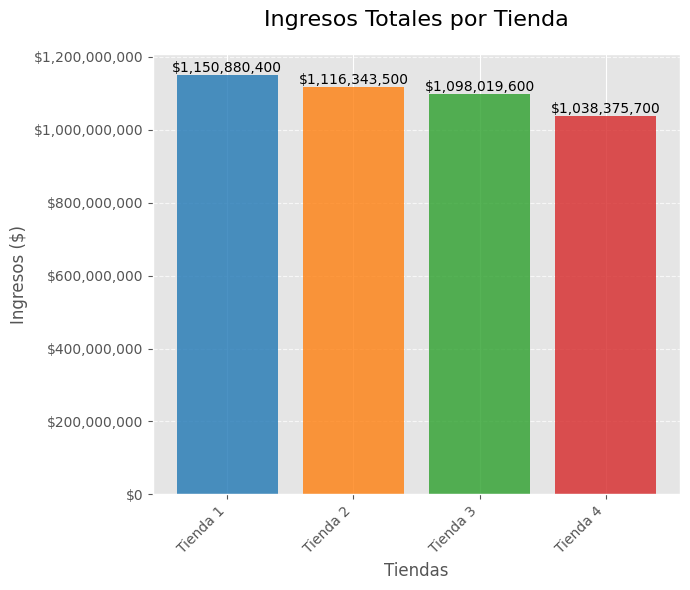

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [IngresoT_Tienda1, IngresoT_Tienda2, IngresoT_Tienda3, IngresoT_Tienda4]

plt.figure(figsize=(7, 6))
bars = plt.bar(tiendas, ingresos, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.8)

plt.title('Ingresos Totales por Tienda', fontsize=16, pad=20)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Ingresos ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter('${x:,.0f}')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom',
             fontsize=10)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


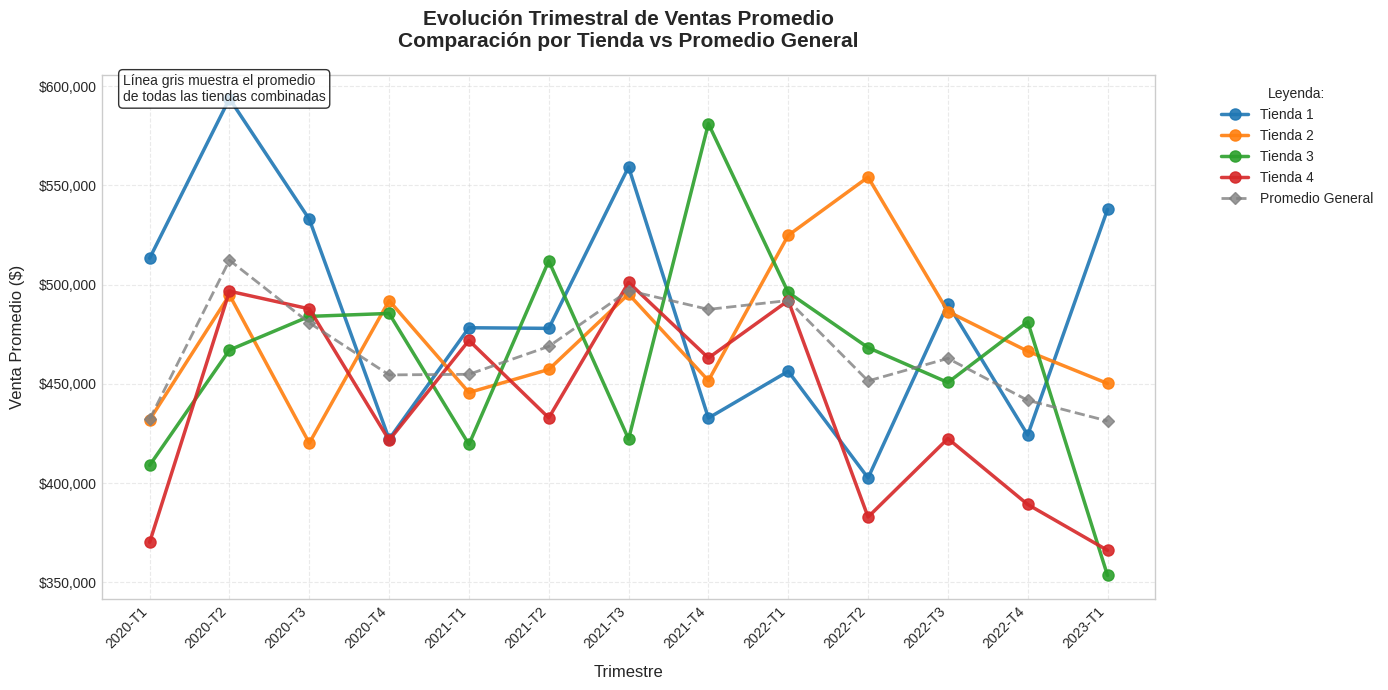

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter

# Preparación de datos (versión corregida)
dfs = []
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
    df['Tienda'] = f'Tienda {i}'
    dfs.append(df)

datos_completos = pd.concat(dfs)

# Procesamiento de fechas (CORRECCIÓN APLICADA AQUÍ)
datos_completos['Fecha de Compra'] = pd.to_datetime(
    datos_completos['Fecha de Compra'],
    format='%d/%m/%Y',  # Especificamos el formato día/mes/año
    errors='coerce'
)

# Resto del procesamiento (igual que antes)
datos_completos['Año'] = datos_completos['Fecha de Compra'].dt.year
datos_completos['Trimestre'] = datos_completos['Fecha de Compra'].dt.quarter
datos_completos['Año-Trimestre'] = datos_completos['Año'].astype(str) + '-T' + datos_completos['Trimestre'].astype(str)

# Cálculo de promedios
ventas_trimestrales = datos_completos.groupby(['Tienda', 'Año-Trimestre'])['Precio'].mean().reset_index()
promedio_general = datos_completos.groupby('Año-Trimestre')['Precio'].mean().reset_index()

# Ordenamiento
orden_trimestres = sorted(ventas_trimestrales['Año-Trimestre'].unique())
ventas_trimestrales['Año-Trimestre'] = pd.Categorical(
    ventas_trimestrales['Año-Trimestre'],
    categories=orden_trimestres,
    ordered=True
)
ventas_trimestrales = ventas_trimestrales.sort_values(['Tienda', 'Año-Trimestre'])

# Configuración del gráfico (igual que antes)
plt.figure(figsize=(14, 7))
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Líneas por tienda
for i, tienda in enumerate(ventas_trimestrales['Tienda'].unique()):
    datos_tienda = ventas_trimestrales[ventas_trimestrales['Tienda'] == tienda]
    plt.plot(datos_tienda['Año-Trimestre'],
             datos_tienda['Precio'],
             marker='o',
             markersize=8,
             label=tienda,
             color=colores[i],
             linewidth=2.5,
             alpha=0.9)

# Línea de promedio general
plt.plot(promedio_general['Año-Trimestre'],
         promedio_general['Precio'],
         color='#7F7F7F',
         linestyle='--',
         linewidth=2,
         marker='D',
         markersize=6,
         label='Promedio General',
         alpha=0.8)

# Personalización (igual que antes)
plt.title('Evolución Trimestral de Ventas Promedio\nComparación por Tienda vs Promedio General',
          fontsize=15, pad=20, fontweight='bold')
plt.xlabel('Trimestre', fontsize=12, labelpad=10)
plt.ylabel('Venta Promedio ($)', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Leyenda:', bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=1)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.tight_layout()
plt.annotate('Línea gris muestra el promedio\nde todas las tiendas combinadas',
             xy=(0.02, 0.95),
             xycoords='axes fraction',
             fontsize=10,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()



---


### **La tienda con menor facturación durante el tiempo analizado fue:**
 **TIENDA 4**

 La cual ha tenido una facturación por de bajo del promedio general de la mayoría de los periodos analizados


---



# 2. Ventas por categoría

In [ ]:
'''
Creeamos una tabla que muestre los Poductos vendidos por Categoría en cada Tienda,
Ordenando las categorías de mayor a menor cantidad de productos vendidos.
'''
for i,df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
  conteo = df.groupby("Categoría del Producto").size()\
            .reset_index(name=f'Tienda{i}_Cantidad')\
            .sort_values(by=f'Tienda{i}_Cantidad', ascending=False)
  print(f'\nTienda{i} - Productos por categoría:')
  print(conteo)


Tienda1 - Productos por categoría:
    Categoría del Producto  Tienda1_Cantidad
7                  Muebles               465
3             Electrónicos               448
5                 Juguetes               324
2        Electrodomésticos               312
1     Deportes y diversión               284
4   Instrumentos musicales               182
6                   Libros               173
0  Artículos para el hogar               171

Tienda2 - Productos por categoría:
    Categoría del Producto  Tienda2_Cantidad
7                  Muebles               442
3             Electrónicos               422
5                 Juguetes               313
2        Electrodomésticos               305
1     Deportes y diversión               275
4   Instrumentos musicales               224
6                   Libros               197
0  Artículos para el hogar               181

Tienda3 - Productos por categoría:
    Categoría del Producto  Tienda3_Cantidad
7                  Muebles           

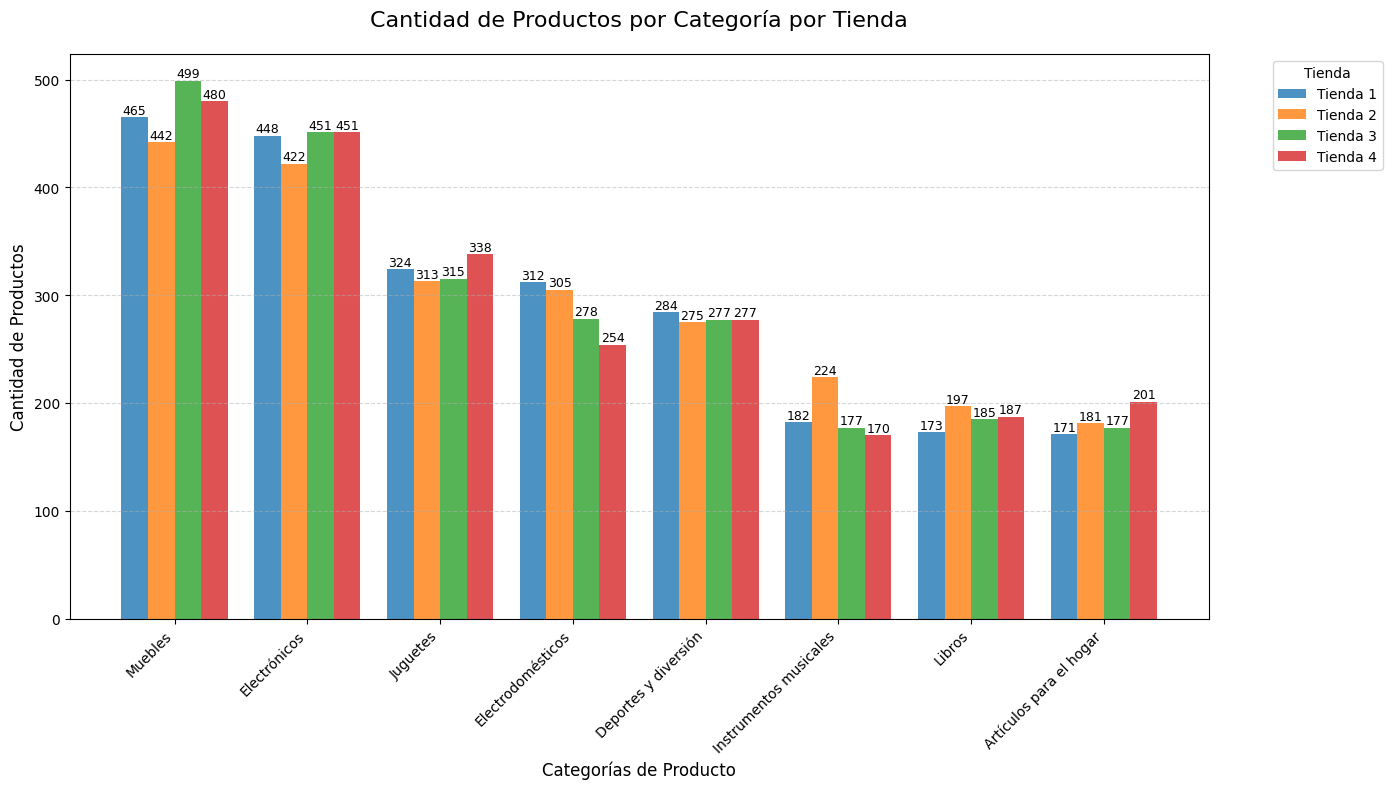

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Preparar los datos
datos_tiendas = []
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
    conteo = df['Categoría del Producto'].value_counts().reset_index()
    conteo.columns = ['Categoría', f'Tienda {i}']
    datos_tiendas.append(conteo)

# 2. Combinar todos los datos
df_final = datos_tiendas[0]
for df in datos_tiendas[1:]:
    df_final = pd.merge(df_final, df, on='Categoría', how='outer')
df_final = df_final.fillna(0)

# 3. Ordenar por categoría más común (opcional)
df_final['Total'] = df_final.sum(axis=1, numeric_only=True)
df_final = df_final.sort_values('Total', ascending=False)
df_final = df_final.drop('Total', axis=1)

# 4. Configuración del gráfico
categorias = df_final['Categoría']
tiendas = [col for col in df_final.columns if col != 'Categoría']
x = np.arange(len(categorias))
ancho_barra = 0.2  # Ancho de cada barra

plt.figure(figsize=(14, 8))

# 5. Crear barras para cada tienda
for i, tienda_col in enumerate(tiendas):
    desplazamiento = ancho_barra * i
    plt.bar(x + desplazamiento,
            df_final[tienda_col],
            width=ancho_barra,
            label=tienda_col,
            alpha=0.8)

# 6. Personalización del gráfico
plt.title('Cantidad de Productos por Categoría por Tienda', fontsize=16, pad=20)
plt.xlabel('Categorías de Producto', fontsize=12)
plt.ylabel('Cantidad de Productos', fontsize=12)
plt.xticks(x + ancho_barra*(len(tiendas)-1)/2, categorias, rotation=45, ha='right') #Corrected this line
plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 7. Añadir etiquetas de valor
for i, tienda_col in enumerate(tiendas):
    desplazamiento = ancho_barra * i
    for j, valor in enumerate(df_final[tienda_col]):
        if valor > 0:  # Solo mostrar etiquetas para valores positivos
            plt.text(x[j] + desplazamiento,
                    valor + 0.5,
                    int(valor),
                    ha='center',
                    va='bottom',
                    fontsize=9)

plt.tight_layout()
plt.show()


---
### **La categoría con menores ventas fue:**

 ***Artículos para el hogar***

 Seguida de la categoría ***Libros***

---

# 3. Calificación promedio de la tienda


In [13]:
#Creamos el calculo del promedio de calificación de cada tienda.
calculo_promedio = pd.DataFrame({
    "Tienda": [f'Tienda {i}' for i in range(1, 5)],
    "Calificación promedio": [tienda["Calificación"].mean(),
                              tienda2["Calificación"].mean(),
                              tienda3["Calificación"].mean(),
                              tienda4["Calificación"].mean()]
                                                              })

#Ordenamos de mayor a menor calificación
calculo_promedio = calculo_promedio.sort_values("Calificación promedio", ascending=False).reset_index(drop=True)

print("\nCalificación promedio de cada tienda:")
print(calculo_promedio)


Calificación promedio de cada tienda:
     Tienda  Calificación promedio
0  Tienda 3               4.048326
1  Tienda 2               4.037304
2  Tienda 4               3.995759
3  Tienda 1               3.976685


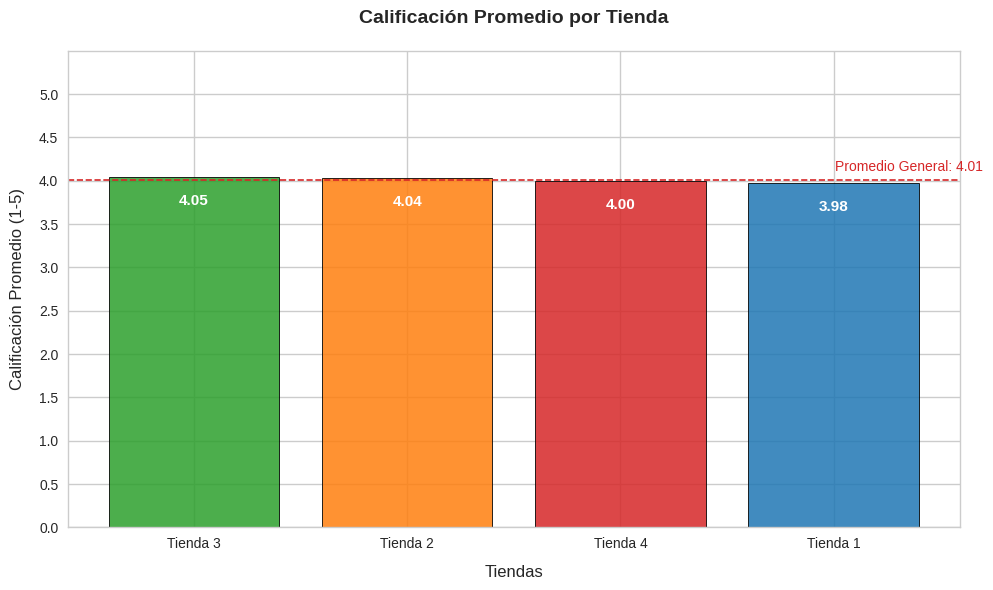


Calificación promedio de cada tienda:
     Tienda  Calificación promedio
0  Tienda 3               4.048326
1  Tienda 2               4.037304
2  Tienda 4               3.995759
3  Tienda 1               3.976685


In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración del estilo
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

# Datos ordenados
tiendas = calculo_promedio["Tienda"]
promedios = calculo_promedio["Calificación promedio"]

# Paleta de colores profesional
colores = [ '#2ca02c','#ff7f0e', '#d62728', '#1f77b4' ]

# Crear gráfico de barras
bars = plt.bar(tiendas, promedios, color=colores, alpha=0.85, edgecolor='black', linewidth=0.7)

# Personalización avanzada
plt.title('Calificación Promedio por Tienda', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Tiendas', fontsize=12, labelpad=10)
plt.ylabel('Calificación Promedio (1-5)', fontsize=12, labelpad=10)
plt.ylim(0, 5.5)  # Rango adecuado para calificaciones (1-5)

# Añadir etiquetas de valor con formato
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height - 0.2,
            f'{height:.2f}',
            ha='center', va='top',
            color='white',
            fontsize=11,
            fontweight='bold')

# Línea de referencia para el promedio general
promedio_general = promedios.mean()
plt.axhline(y=promedio_general, color='#D62728', linestyle='--', linewidth=1.2)
plt.text(len(tiendas)-0.3, promedio_general + 0.1,
        f'Promedio General: {promedio_general:.2f}',
        color='#D62728',
        ha='right',
        fontsize=10)

# Mejorar los ticks del eje Y
plt.yticks(np.arange(0, 5.5, 0.5))

# Añadir anotación opcional con insights
if (promedios.max() - promedios.min()) > 1.5:
    plt.text(0.5, 0.95,
            "Variación significativa entre tiendas",
            transform=plt.gca().transAxes,
            fontsize=10,
            color='#2CA02C',
            ha='center')

plt.tight_layout()
plt.show()

print("\nCalificación promedio de cada tienda:")
print(calculo_promedio)

---
### **La Tienda con la calificación más baja por parte de los consumidores fue:**

**TIENDA 1**

La cual tiene una calificación promedio menor al promedio general, seguida de **TIENDA 4** con una calificación promedio igual al promedio general.

---

# 4. Productos más y menos vendidos

In [40]:
'''
Creamos la función para analizar los productos más y menos vendidos en cada tienda
Ordenamos de mayor a menor cantidad de productos vendidos.
'''

def productos_mas_menos_vendidos(tienda, numero_tienda):
  ventas_producto = tienda ["Producto"].value_counts().reset_index()
  ventas_producto.columns = ["Producto", "Cantidad"]

  ventas_producto = ventas_producto.sort_values("Cantidad", ascending=False)

  #Para caluclar el producto más vendido y el producto menos vendido
  mas_vendido = ventas_producto.iloc[0]
  menos_vendido = ventas_producto.iloc[-1]

  print(f'\nAnálisis Tienda {numero_tienda}:')
  print(f'Producto más vendido: {mas_vendido ["Producto"]} con {mas_vendido["Cantidad"]} unidades')
  print(f'Producto menos vendido: {menos_vendido ["Producto"]} con {menos_vendido ["Cantidad"]} unidades')

  return ventas_producto

#Ahora aplicamos la función los datos
resultados ={}
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
  resultados[f'Tienda {i}'] = productos_mas_menos_vendidos(df, i)


Análisis Tienda 1:
Producto más vendido: Microondas con 60 unidades
Producto menos vendido: Celular ABXY con 33 unidades

Análisis Tienda 2:
Producto más vendido: Iniciando en programación con 65 unidades
Producto menos vendido: Juego de mesa con 32 unidades

Análisis Tienda 3:
Producto más vendido: Kit de bancas con 57 unidades
Producto menos vendido: Bloques de construcción con 35 unidades

Análisis Tienda 4:
Producto más vendido: Cama box con 62 unidades
Producto menos vendido: Guitarra eléctrica con 33 unidades


<Figure size 1400x800 with 0 Axes>

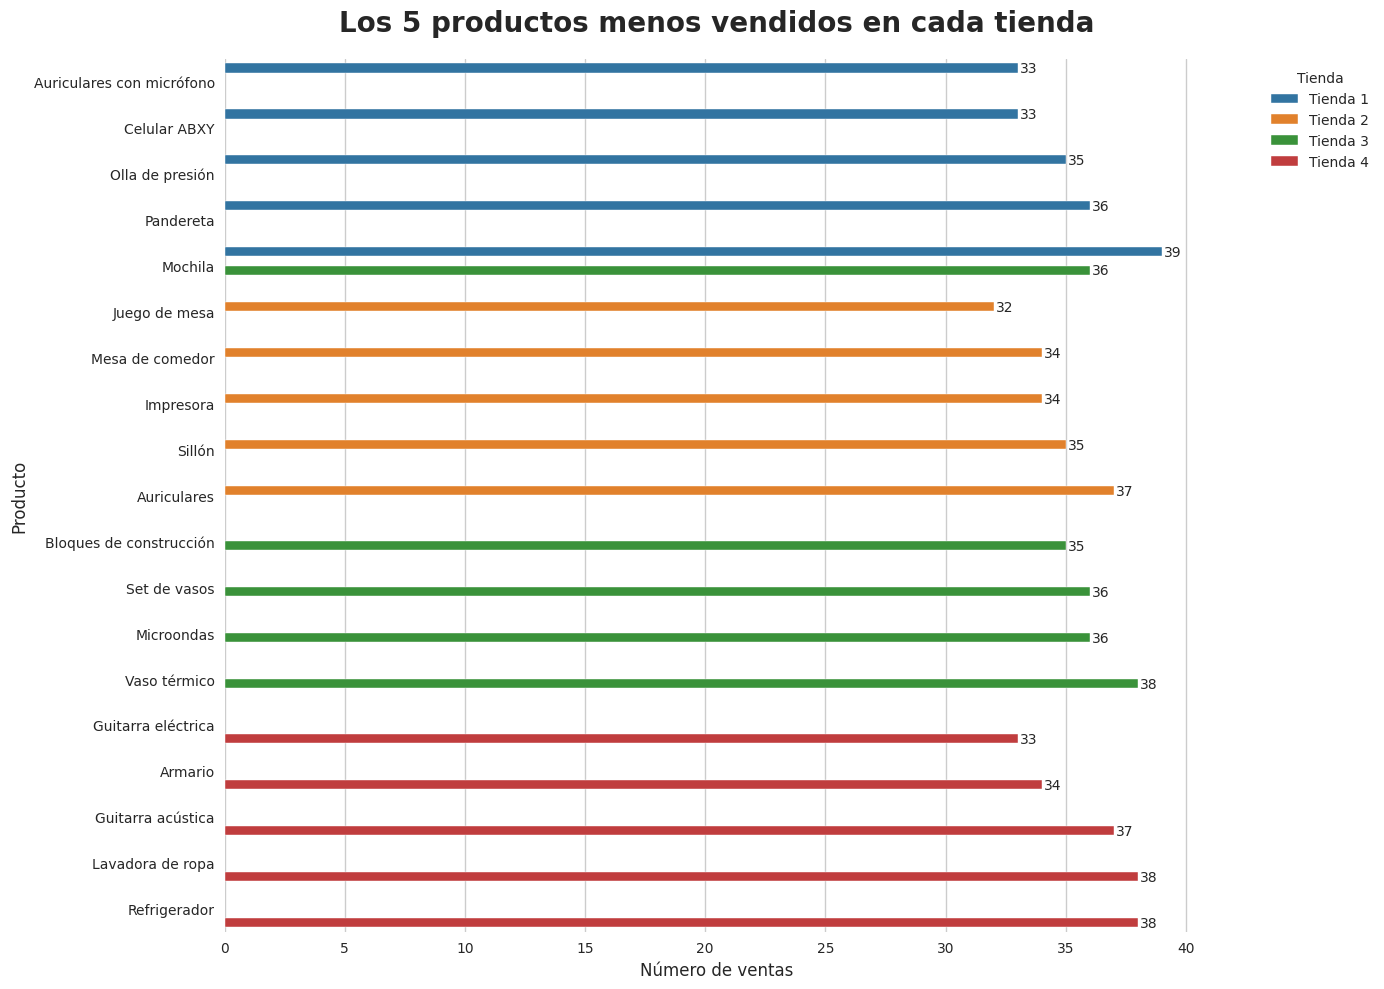

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(14, 8))

# Colores personalizados para cada tienda
COLORES_TIENDAS = {
    'Tienda 1': '#1f77b4',
    'Tienda 2': '#ff7f0e',
    'Tienda 3': '#2ca02c',
    'Tienda 4': '#d62728'
}

# Lista para almacenar todos los datos
all_least_sold = pd.DataFrame()

# Procesar cada tienda
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
    # Verificar si el DataFrame tiene datos
    if not isinstance(df, pd.DataFrame):
        raise ValueError(f"tienda{i} no es un DataFrame válido")

    # Contar ventas por producto y obtener los 7 menos vendidos
    product_counts = df['Producto'].value_counts().nsmallest(5).reset_index()
    product_counts.columns = ['Producto', 'Ventas']
    product_counts['Tienda'] = f'Tienda {i}'

    # Agregar a los datos consolidados
    all_least_sold = pd.concat([all_least_sold, product_counts])

# Verificar si hay datos para graficar
if all_least_sold.empty:
    raise ValueError("No hay datos para graficar")

# Crear el gráfico
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")  # Estilo alternativo

# Gráfico de barras agrupadas
ax = sns.barplot(data=all_least_sold,
                 x='Ventas',
                 y='Producto',
                 hue='Tienda',
                 dodge=True,
                 palette=COLORES_TIENDAS)

# Personalización
plt.title('Los 5 productos menos vendidos en cada tienda', fontsize=20, pad=20, fontweight='bold')
plt.xlabel('Número de ventas', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir etiquetas de valor
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 0.1,
                p.get_y() + p.get_height()/2.,
                f'{int(width)}',
                ha='left',
                va='center')

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

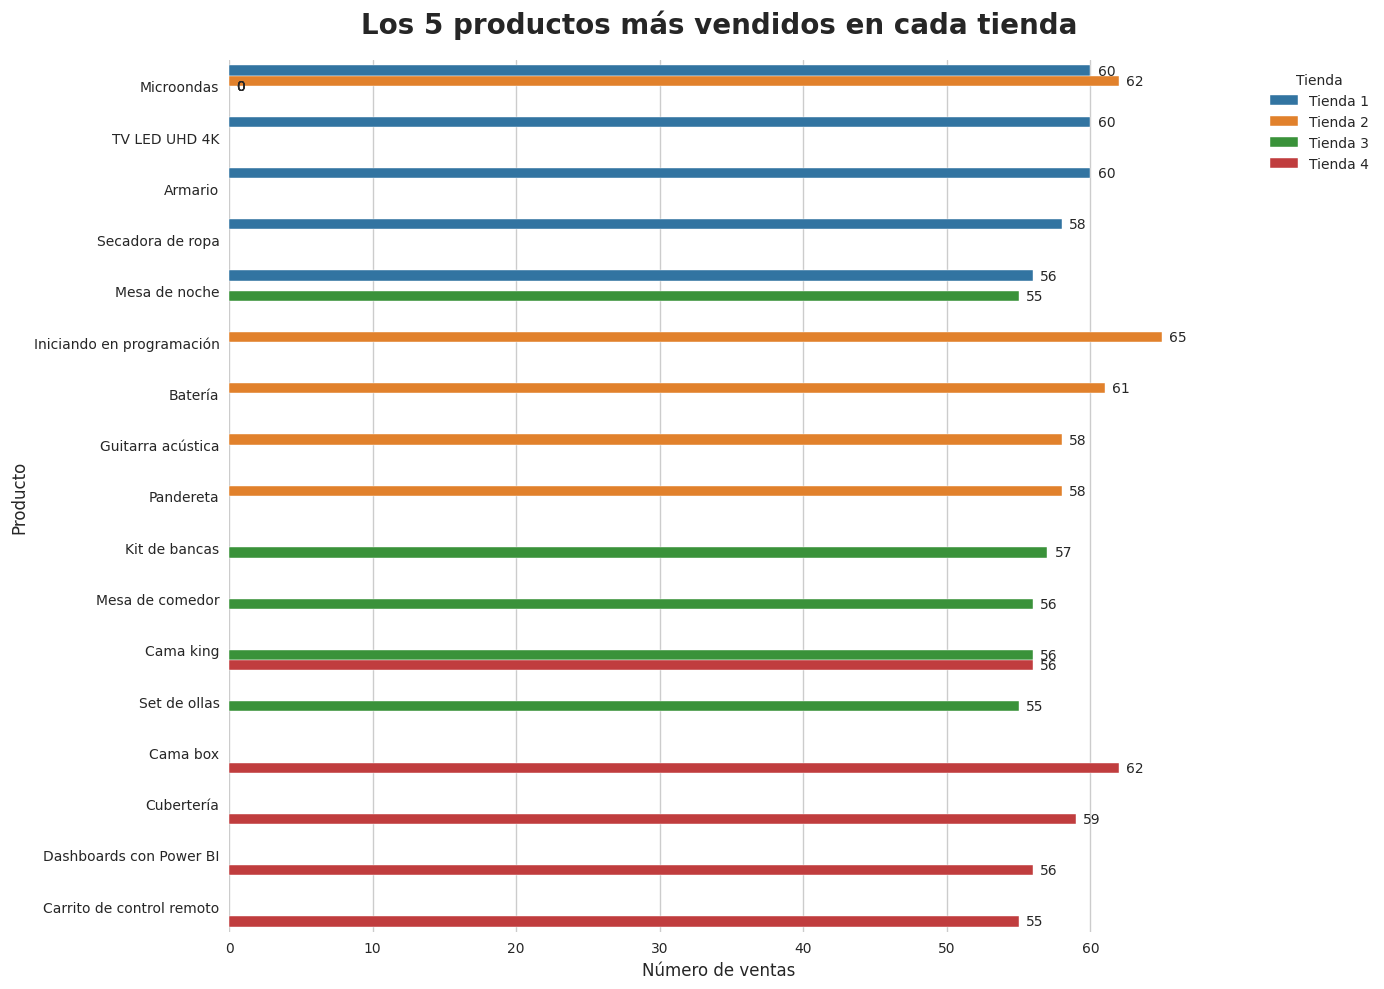

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

# Colores personalizados para cada tienda
COLORES_TIENDAS = {
    'Tienda 1': '#1f77b4',
    'Tienda 2': '#ff7f0e',
    'Tienda 3': '#2ca02c',
    'Tienda 4': '#d62728'
}

# Lista para almacenar todos los datos
all_top_sold = pd.DataFrame()

# Procesar cada tienda
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
    tienda_nombre = f'Tienda {i}'
    # Verificar si el DataFrame es válido
    if not isinstance(df, pd.DataFrame):
        print(f"Advertencia: {tienda_nombre} no es un DataFrame válido")
        continue

    # Contar ventas por producto y obtener los 7 más vendidos
    try:
        product_counts = df['Producto'].value_counts().nlargest(5).reset_index()
        product_counts.columns = ['Producto', 'Ventas']
        product_counts['Tienda'] = tienda_nombre
        all_top_sold = pd.concat([all_top_sold, product_counts])
    except KeyError:
        print(f"Advertencia: La columna 'Producto' no existe en {tienda_nombre}")

# Verificar si hay datos para graficar
if all_top_sold.empty:
    print("No hay datos válidos para graficar")
else:
    # Crear el gráfico de barras horizontales
    plt.figure(figsize=(14, 10))
    ax = sns.barplot(data=all_top_sold,
                     x='Ventas',
                     y='Producto',
                     hue='Tienda',
                     palette=COLORES_TIENDAS,
                     dodge=True)

    # Personalización del gráfico
    plt.title('Los 5 productos más vendidos en cada tienda', fontsize=20, pad=20, fontweight='bold')
    plt.xlabel('Número de ventas', fontsize=12)
    plt.ylabel('Producto', fontsize=12)
    plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Añadir etiquetas de valor
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.5,
                p.get_y() + p.get_height()/2.,
                f'{int(width)}',
                ha='left',
                va='center',
                fontsize=10)

    plt.tight_layout()
    plt.show()

<Figure size 1600x1000 with 0 Axes>

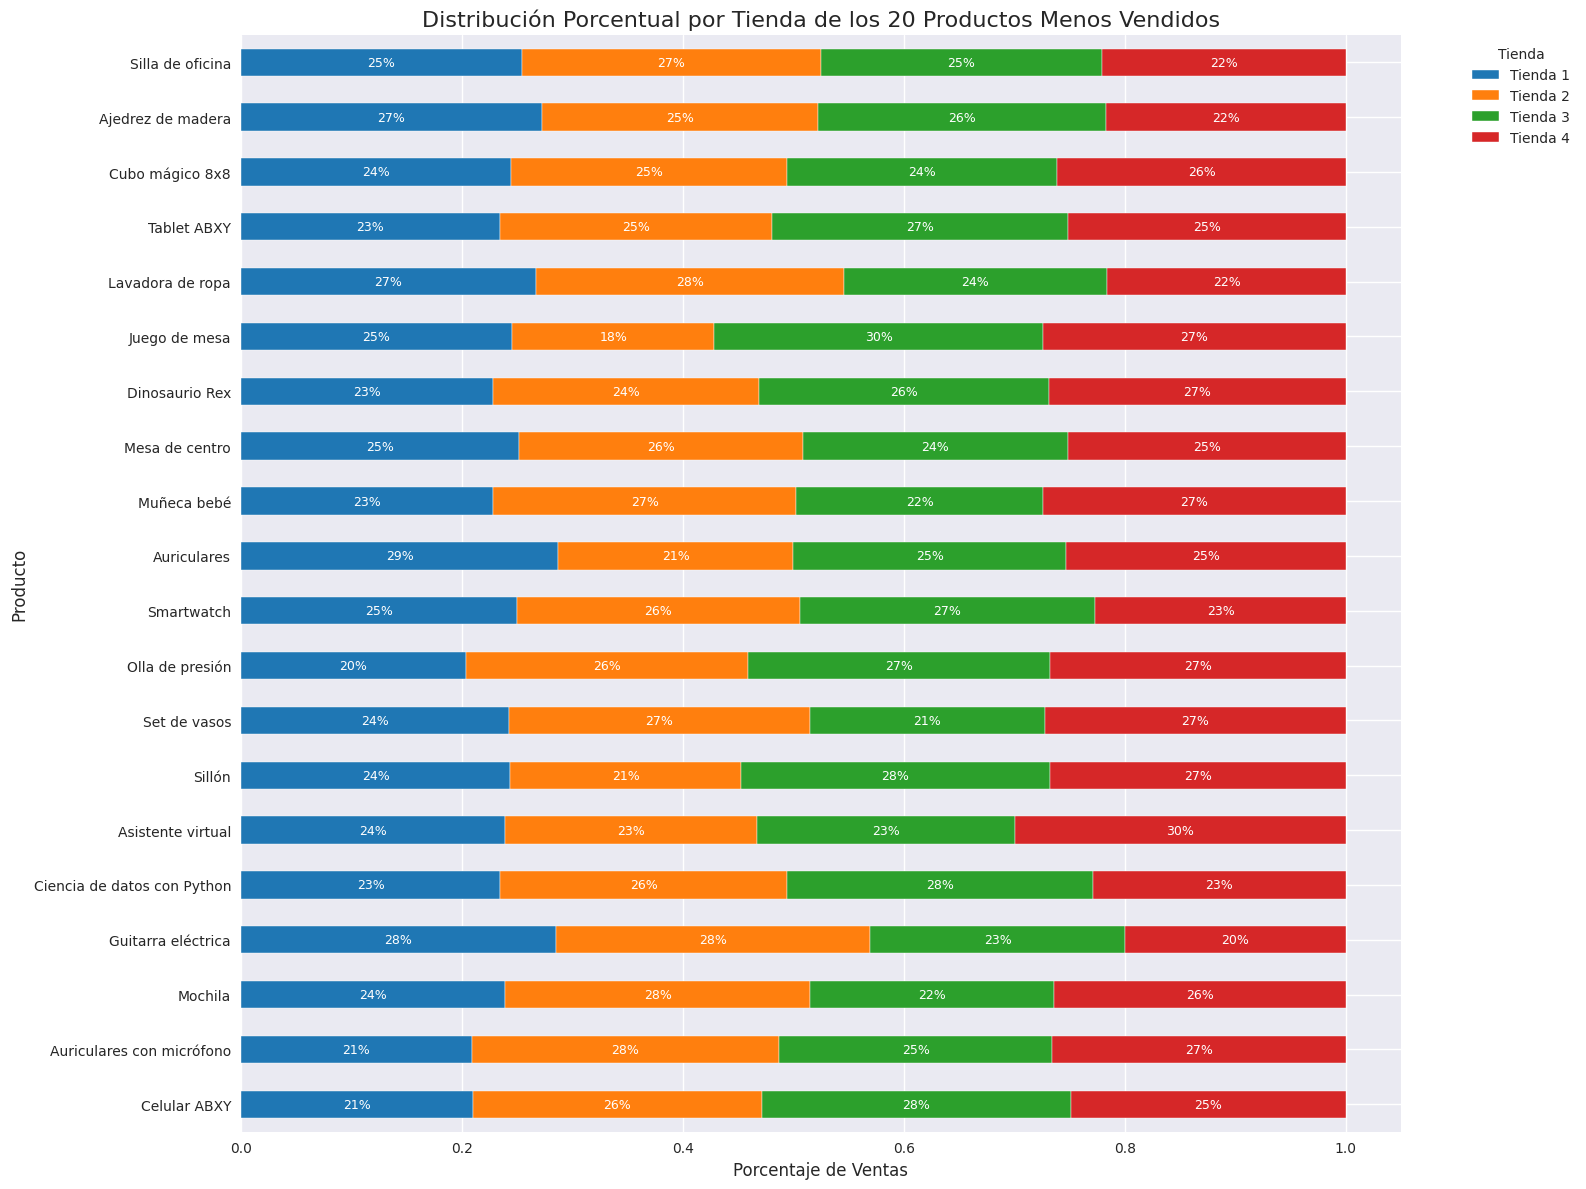

In [64]:
# Gráfico de porcentajes por tienda
distribucion_porcentual = distribucion_tiendas.div(distribucion_tiendas.sum(axis=1), axis=0)

plt.figure(figsize=(16, 10))
ax = distribucion_porcentual.plot(kind='barh',
                                 stacked=True,
                                 color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
                                 figsize=(16, 12))

plt.title('Distribución Porcentual por Tienda de los 15 Productos Menos Vendidos', fontsize=16)
plt.xlabel('Porcentaje de Ventas', fontsize=12)
plt.ylabel('Producto', fontsize=12)

# Añadir etiquetas de porcentaje
for i, (idx, row) in enumerate(distribucion_porcentual.iterrows()):
    acumulado = 0
    for tienda, valor in row.items():
        if valor > 0.05:  # Solo mostrar porcentajes mayores al 5%
            ax.text(acumulado + valor/2, i,
                   f'{valor:.0%}',
                   ha='center',
                   va='center',
                   color='white',
                   fontsize=9)
        acumulado += valor

plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
#Creamos una funciones para calcular el costo promedio de envío
def calcular_costo_promedio_envio(df_tiendas):
  for i, df in enumerate(df_tiendas, start=1):
        df["Tienda"] = f'Tienda {i}'

  datos_completos = pd.concat(df_tiendas)
  costo_promedio = (datos_completos.groupby("Tienda")["Costo de envío"]
                    .mean()
                    .reset_index()
                    .sort_values("Costo de envío", ascending=False))

  costo_promedio.columns = ["Tienda", "Costo promedio de envío"]

  return costo_promedio

#Aplicamos la función a los datos
resultados = calcular_costo_promedio_envio([tienda, tienda2, tienda3, tienda4])
print(resultados)

     Tienda  Costo promedio de envío
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


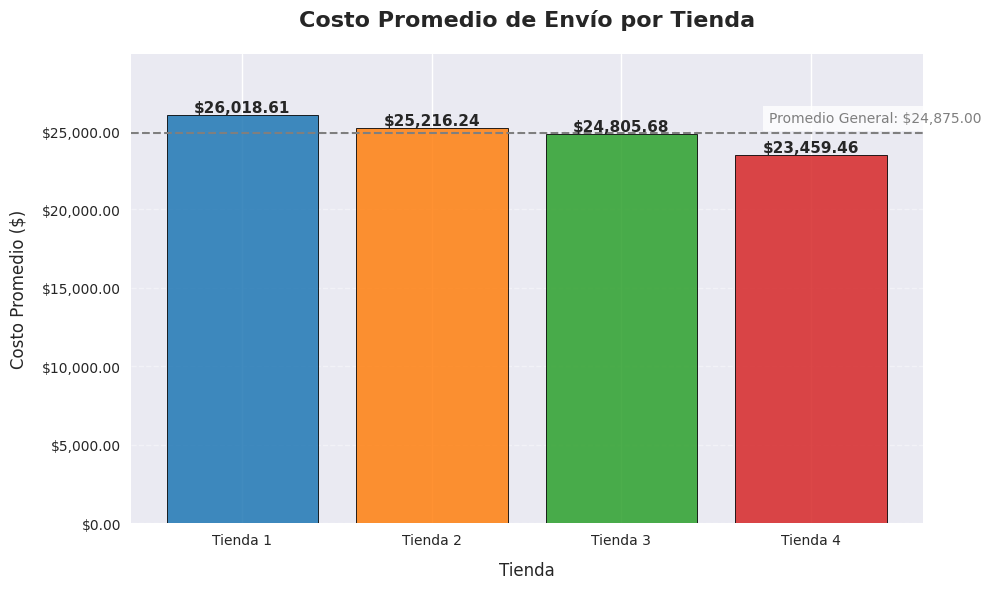

     Tienda  Costo promedio de envío
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'DejaVu Sans'  # Fuente compatible

# Definir colores personalizados para cada tienda
COLORES_TIENDAS = {
    'Tienda 1': '#1f77b4',
    'Tienda 2': '#ff7f0e',
    'Tienda 3': '#2ca02c',
    'Tienda 4': '#d62728'
}

# Función para calcular costos (la que proporcionaste)
def calcular_costo_promedio_envio(df_tiendas):
    for i, df in enumerate(df_tiendas, start=1):
        df["Tienda"] = f'Tienda {i}'

    datos_completos = pd.concat(df_tiendas)
    costo_promedio = (datos_completos.groupby("Tienda")["Costo de envío"]
                      .mean()
                      .reset_index()
                      .sort_values("Costo de envío", ascending=False))

    costo_promedio.columns = ["Tienda", "Costo promedio de envío"]
    return costo_promedio

# Aplicar la función
resultados = calcular_costo_promedio_envio([tienda, tienda2, tienda3, tienda4])

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# Gráfico de barras con colores personalizados
bars = plt.bar(resultados["Tienda"],
               resultados["Costo promedio de envío"],
               color=[COLORES_TIENDAS[tienda] for tienda in resultados["Tienda"]],
               alpha=0.85,
               edgecolor='black',
               linewidth=0.7)

# Personalización avanzada
plt.title('Costo Promedio de Envío por Tienda', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Tienda', fontsize=12, labelpad=10)
plt.ylabel('Costo Promedio ($)', fontsize=12, labelpad=10)
plt.ylim(0, resultados["Costo promedio de envío"].max() * 1.15)  # Margen superior

# Añadir etiquetas de valor con formato monetario
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.2f}',
             ha='center',
             va='bottom',
             fontsize=11,
             fontweight='bold')

# Línea de promedio general
promedio_general = resultados["Costo promedio de envío"].mean()
plt.axhline(y=promedio_general, color='#7F7F7F', linestyle='--', linewidth=1.5)
plt.text(len(resultados)-0.1, promedio_general * 1.02,
         f'Promedio General: ${promedio_general:,.2f}',
         ha='right',
         va='bottom',
         color='#7F7F7F',
         fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Mejorar los ticks del eje Y
plt.gca().yaxis.set_major_formatter('${x:,.2f}')

# Añadir cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

print(resultados)

---
### **Tienda con el costo de envio promedio más alto es:**

***TIENDA 1***

Seguida de la TIENDA 2, ambas tiendas sobrepasan el promedio general de costo de envio.




---



# **Informe final**
---

## **Introducción**

Este informe tiene como objetivo evaluar el desempeño de las cuatro tiendas de la cadena Alura Store con la intención de ayudar al Sr. Juan a decidir qué tienda debe vender.

Se analizaron cinco métricas clave:
*   Ingresos totales por tienda
*   Ventas por categoría de productos
*   Calificación promedio de tienda
*   Productos más y menos vendidos
*   Costo promedio de envío

Este análsis busca identificar las fortalezas y debilidades de cada tienda para determinar cuál presenta el mejor balance entre eficiencia operativa y demanda de productos.

## **Análisis**

### **Ingresos por tienda**

*  La **TIENDA 1** ha tenido la facturación **más alta** de las cuatro tiendas de la cadena con $1,150,880,400.00

*  La **TIENDA 4** ha tenido la facturación **más baja** de las cuatro tiendas con $1,038,375,700.00

Esto establece una diferencia de $112,504,700.00 entre la tienda con mayores ingreso y la tienda con los menores ingresos.

*  Las **TIENDA** 2 y **TIENDA 3** lograron mantener una facturación alrededor del promedio de ingresos general durante el periodo analizado.

### **Ventas por categoría de productos**

*  ***MUEBLES*** y ***ELECTRÓNICOS*** son las dos categorías con mayor cantidad de ventas en todas las tiendas.
  *  Las tiendas que lideran la venta de estascategorías son **TIENDA 3** y **TIENDA 4**

*  ***LIBROS*** y ***ARTÍCULOS PARA EL HOGAR*** son las dos categorías con menor cantidad de ventas.
  *  Las tiendas que lideran la venta de estas categorías son **TIENDA 2** y **TIENDA 4**

### **Calificación promedio de tiendas**

* **TIENDA 3** tiene la mejor calificación promedio de 4.05/5, superando ligeramente el promedio general de 4.01.

* **TIENDA 1** tiene la calificación promedio más baja con 3.98/5, lo cual la coloca por de bajo del promedio general.

* La **TIENDA 4** tiene el segundo promedio más bajo con 4/5, la cual es casi identico al promedio.

Un promedio general de 4.01 indica que el desempeño global de las tiendas de las cadenas es bueno y los clientes se sienten satisfechos con las compras que han realizado.

### **Productos más y menos vendidos**


### **Envío promedio**

El promedio de envio general de las tiendas es de $24,875.00

* **TIENDA 1** tiene el costo promedio más alto de $26,018.61, significativamente por encima del promedio general. Esto podría sugerir que Tienda 1 puede tener probelmas de logística o una menor eficiencia en sus envíos en general.

* **TIENDA 4** tiene el costo promedio más bajo de $23,459.46, un poco por debajo del promedio general. Esto indica una gestión de envíos más eficiente o con una ubicación o acuerdos logístiocos más favorables.

## **Interpretación**


A pesar de que la **TIENDA 1** lidera la facturación, esta enfrenta costos de envío altos y la calificación promedio es ligeramente inferior.
Es recomendable optimizar la logística para bajar costos de envío y trabajar en la experiencia del cliente para mejorar la satisfacción.

La **TIENDA 2** mantiende un buen equilibrio entre todas las métricas claves

En cuanto a la **TIENDA 3** vemos que esta destaca calificación de clientes y maneja un costo de envío cercano al promedio, pero sus ingresos son un poco menores.
Es recomendable aprobechar la buena reputación de la tienda para aumentar el volumen de ventas.

Finalmente, la **TIENDA 4** muestra tener un mayor eficiencia en cuanto a costos de envío, asunque sus ingresos y calificiones son de los más bajos de todas las tiendas.
Se recomienda aprobechar su ventaja competitiva en costos para atraer más clientes y elevar sus ingresos.

## **Conclusión**

En cuanto a la decisión de **vender** una de las tiendas, mi recomendación es que se venda la **TIENDA 4** por las siguientes razones:

* Genera la menor cantidad de ingresos.
* Calificación promedio de las más bajas junto con Tienda 1, pero esta última genera mayores ingresos.
* El costo de envío bajo puede ser atractivo para un comprador que desee mejorar la tienda.
* Las categorías de productos en las que la tienda 4 tiene mayores ventas son ampliamnete variados, lo cual la hace muy flexible para que el comprandor pueda escoger en que especializarse.

En conclusión, debido a sus bajos ingresos y calificiones por parte de los clientes, el potencial de crecimiento de TIENDA 4 es más incierto comparado con las otras tiendas.